# Wholesale Gasoline Price Prediciton

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("LOTOS.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Price,Excise,Surcharge
0,2004-01-01,2530.0,1514.0,79.28
1,2004-01-08,2580.0,1514.0,79.28
2,2004-01-13,2615.0,1514.0,79.28
3,2004-01-16,2615.0,1514.0,79.28
4,2004-01-21,2650.0,1514.0,79.28


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4527 entries, 0 to 4526
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4527 non-null   datetime64[ns]
 1   Price      4527 non-null   float64       
 2   Excise     4527 non-null   float64       
 3   Surcharge  4527 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 141.6 KB


In [74]:
df.describe()

,Price,Excise,Surcharge
count,4527.000000,4527.000000,4527.000000
mean,3733.120168,1528.269052,111.710241
std,702.738072,65.360465,26.923067
min,2428.000000,1315.000000,79.280000
25%,3304.000000,1540.000000,87.400000
50%,3588.000000,1540.000000,103.160000
75%,4123.000000,1565.000000,131.400000
max,7521.000000,1565.000000,165.140000


In [75]:
working = df.loc[3000:]
working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 3000 to 4526
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1527 non-null   datetime64[ns]
 1   Price      1527 non-null   float64       
 2   Excise     1527 non-null   float64       
 3   Surcharge  1527 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 47.8 KB


In [76]:
import matplotlib.dates as mdate

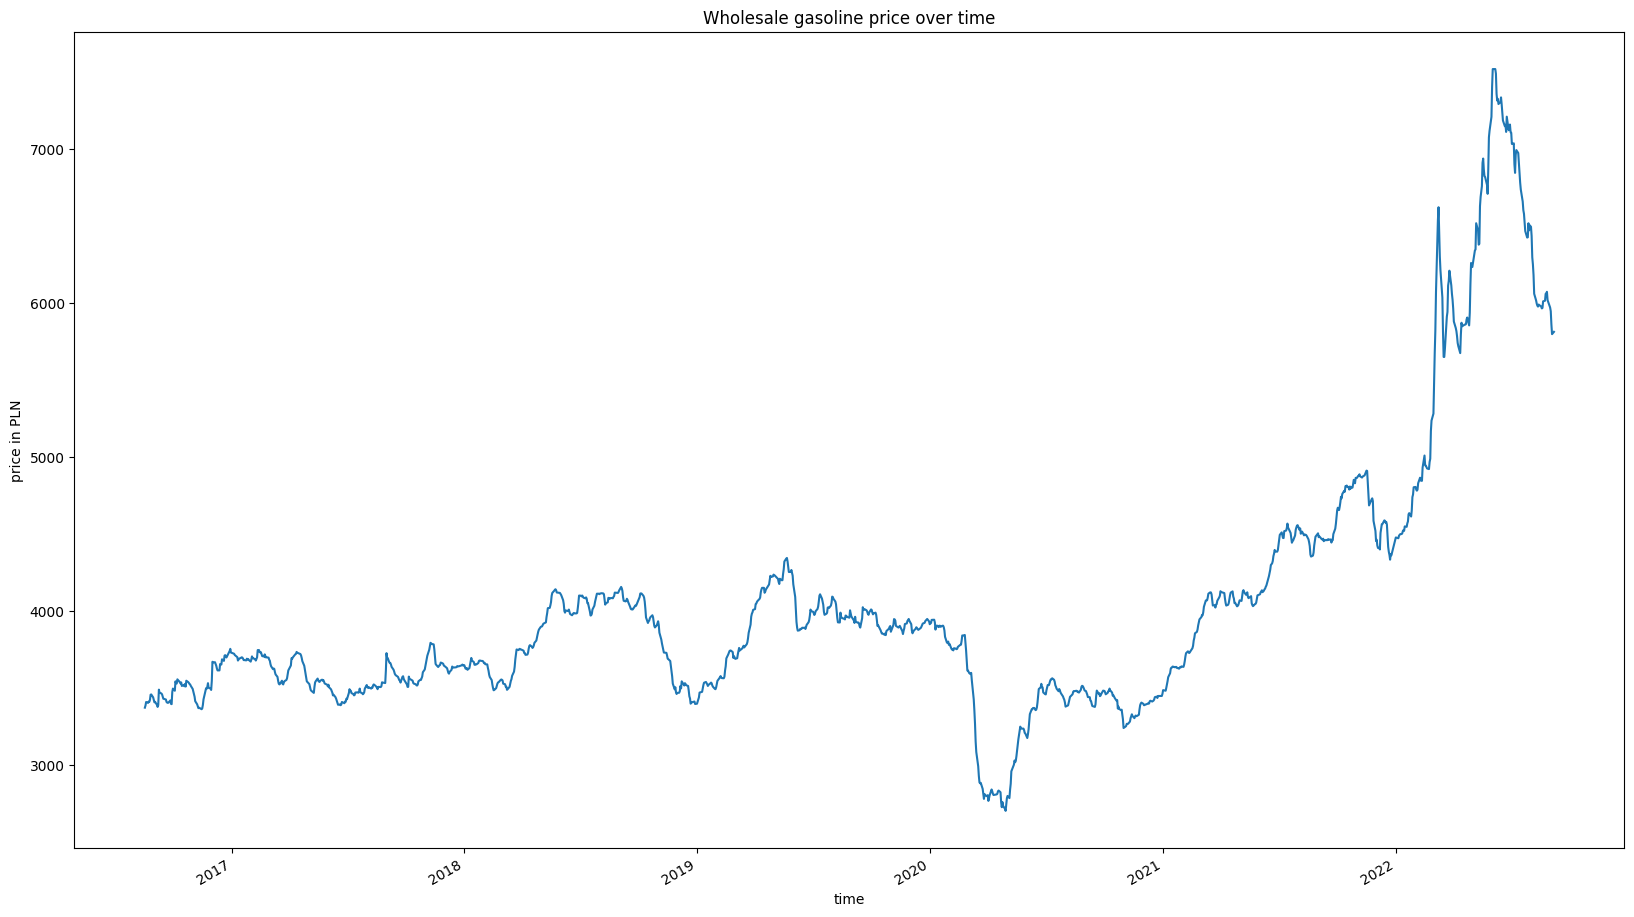

In [77]:
plt.plot(working["Date"], working["Price"])
plt.rcParams['figure.figsize'] = [20, 12]
plt.title("Wholesale gasoline price over time")


locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.show()

# LSTM

In [78]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [79]:
split = 0.65

In [80]:
train, test = working[0: int(len(working)*split)], working[int(len(working)*split):]
train = train["Price"].values
test = test["Price"].values

In [81]:
scaler = MinMaxScaler(feature_range=(0,1))
train = np.reshape(train, (-1,1))
train_scaled = scaler.fit_transform(train)

In [82]:
train_set_size = len(train)
time_steps = 60

X_train = []
y_train = []

for i in range (time_steps, train_set_size):
    X_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # #values, #time-steps, #output
X_train.shape

(932, 60, 1)

Building the Keras model:

In [83]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, epochs= 100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 5s 16ms/step - loss: 0.0561
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0152
Epoch 3/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0121
Epoch 4/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0109
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0108
Epoch 6/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0096
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0087
Epoch 8/100
30/30 [==============================] - 1s 18ms/step - loss: 0.0084
Epoch 9/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0079
Epoch 10/100
30/30 [==============================] - 1s 18ms/step - loss: 0.0081
Epoch 11/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0072
Epoch 12/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 13/100
30/30 [=====

In [84]:
test_set_size = len(test)
test = np.reshape(test, (-1,1))


test = scaler.transform(test)
X_test = []

for i in range (time_steps, test_set_size):
    X_test.append(test[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape

(475, 60, 1)

In [85]:
score = model.evaluate(X_test, )

15/15 [==============================] - 2s 1ms/step - loss: 0.0000e+00


In [86]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

15/15 [==============================] - 2s 7ms/step


In [103]:
test = working[int(len(working)*split):]

MSE = np.sum((test["Price"][time_steps:] - np.concatenate(predicted))**2)/(len(predicted))
RMSE = MSE**0.5
print(f'MSE = {MSE} \nRMSE = {RMSE}')

MSE = 152992.55254879387 
RMSE = 391.1426243057561


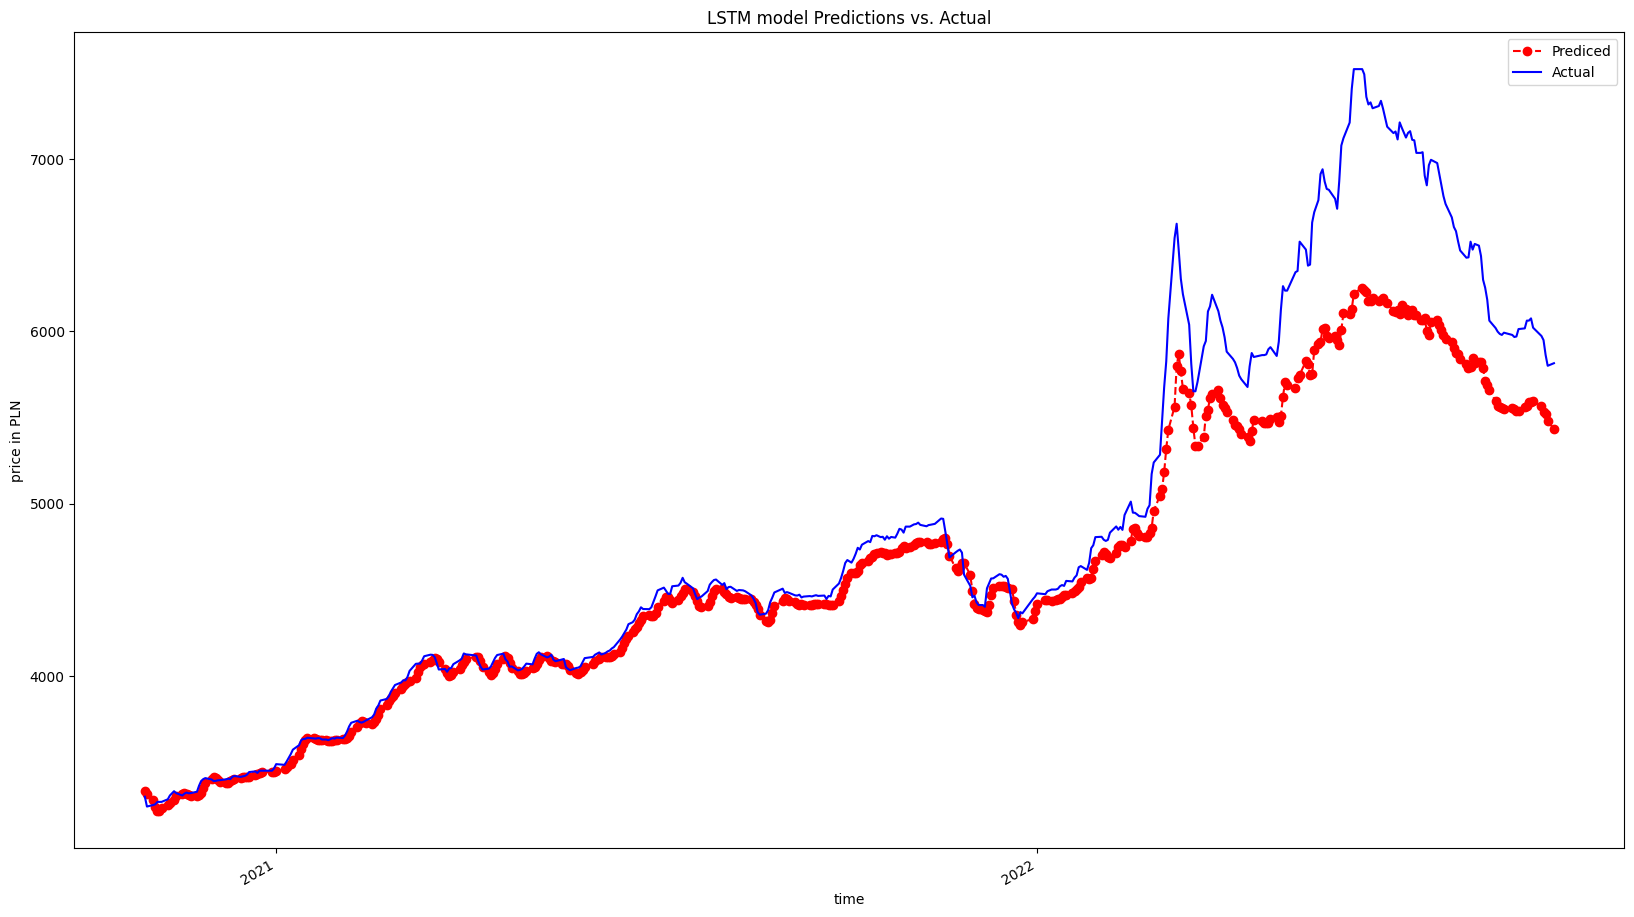

In [104]:
test = working[int(len(working)*split):]

plt.plot(test["Date"][time_steps:], predicted, color = "red", marker = "o", 
linestyle = "dashed", label = "Prediced")

plt.plot(test["Date"][time_steps:], test["Price"][time_steps:], color = "blue", label = "Actual")

plt.rcParams['figure.figsize'] = [20, 12]

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.title("LSTM model Predictions vs. Actual")
plt.legend()
plt.show()

# ARIMA

In [106]:
from pandas.plotting import lag_plot

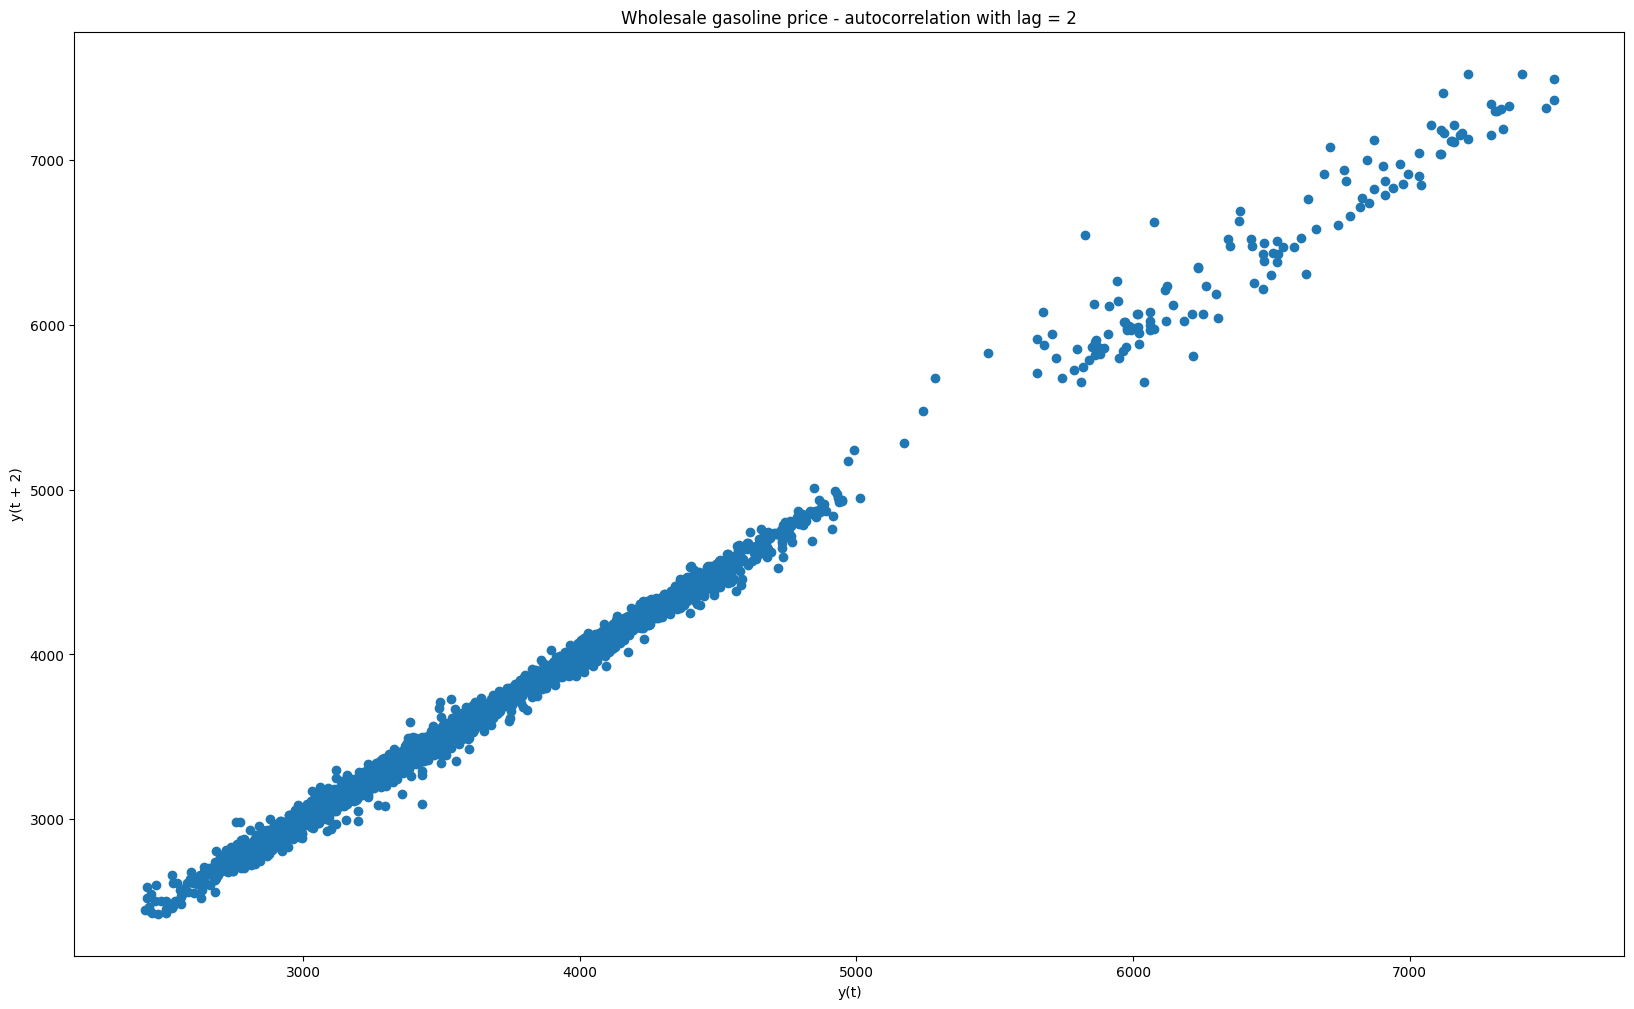

In [107]:
lag = 2

plt.figure()
lag_plot(df["Price"], lag = lag)
plt.title(f"Wholesale gasoline price - autocorrelation with lag = {lag}")
plt.show()

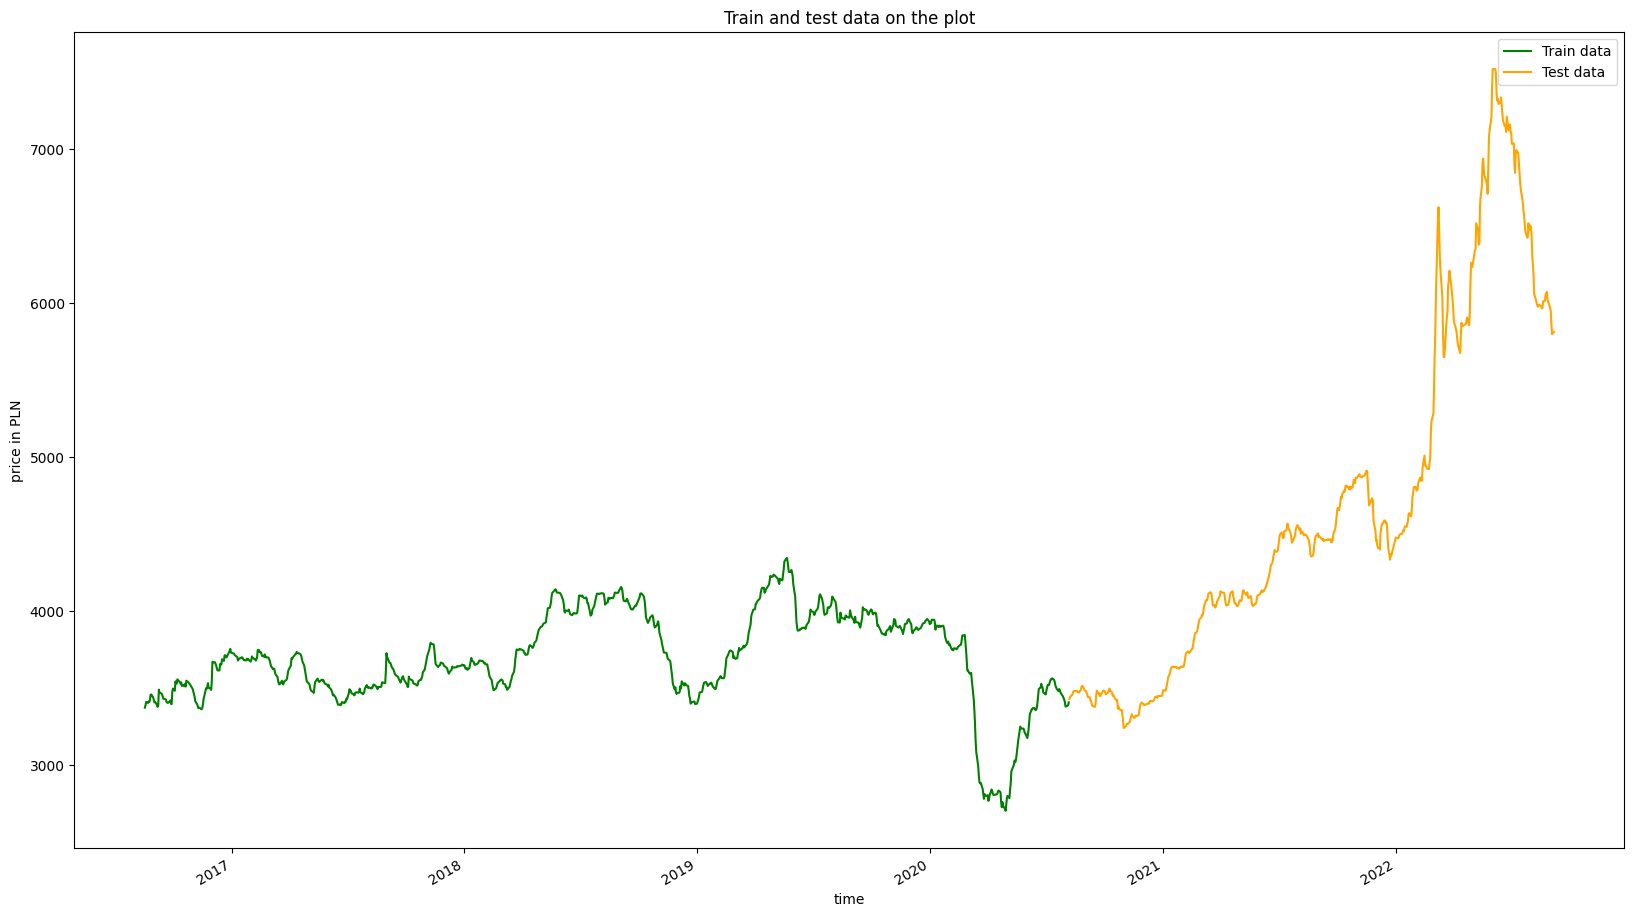

In [108]:
train, test = working[0: int(len(working)*split)], working[int(len(working)*split):]

plt.plot(train["Date"], train["Price"], color = "green", label = "Train data")
plt.plot(test["Date"], test["Price"], color = "orange", label = "Test data")
plt.rcParams['figure.figsize'] = [20, 12]

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.title("Train and test data on the plot")
plt.legend()
plt.show()

In [109]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [110]:
train, test = working[0: int(len(working)*split)], working[int(len(working)*split):]
train = train["Price"].values
test = test["Price"].values

In [111]:
history = [x for x in train]
predictions = []
test_set_size = len(test)

# ARIMA parameters

p=4
d=1
q=0

for time_point in range (test_set_size):
    model = ARIMA(history, order= (p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    true_value = test[time_point]
    history.append(true_value)


In [112]:
MSE = sum((test - predictions)**2)/test_set_size
RMSE = MSE**0.5
print(f'MSE = {MSE} \nRMSE = {RMSE}')

MSE = 2252.2950806332838 
RMSE = 47.458351010473216


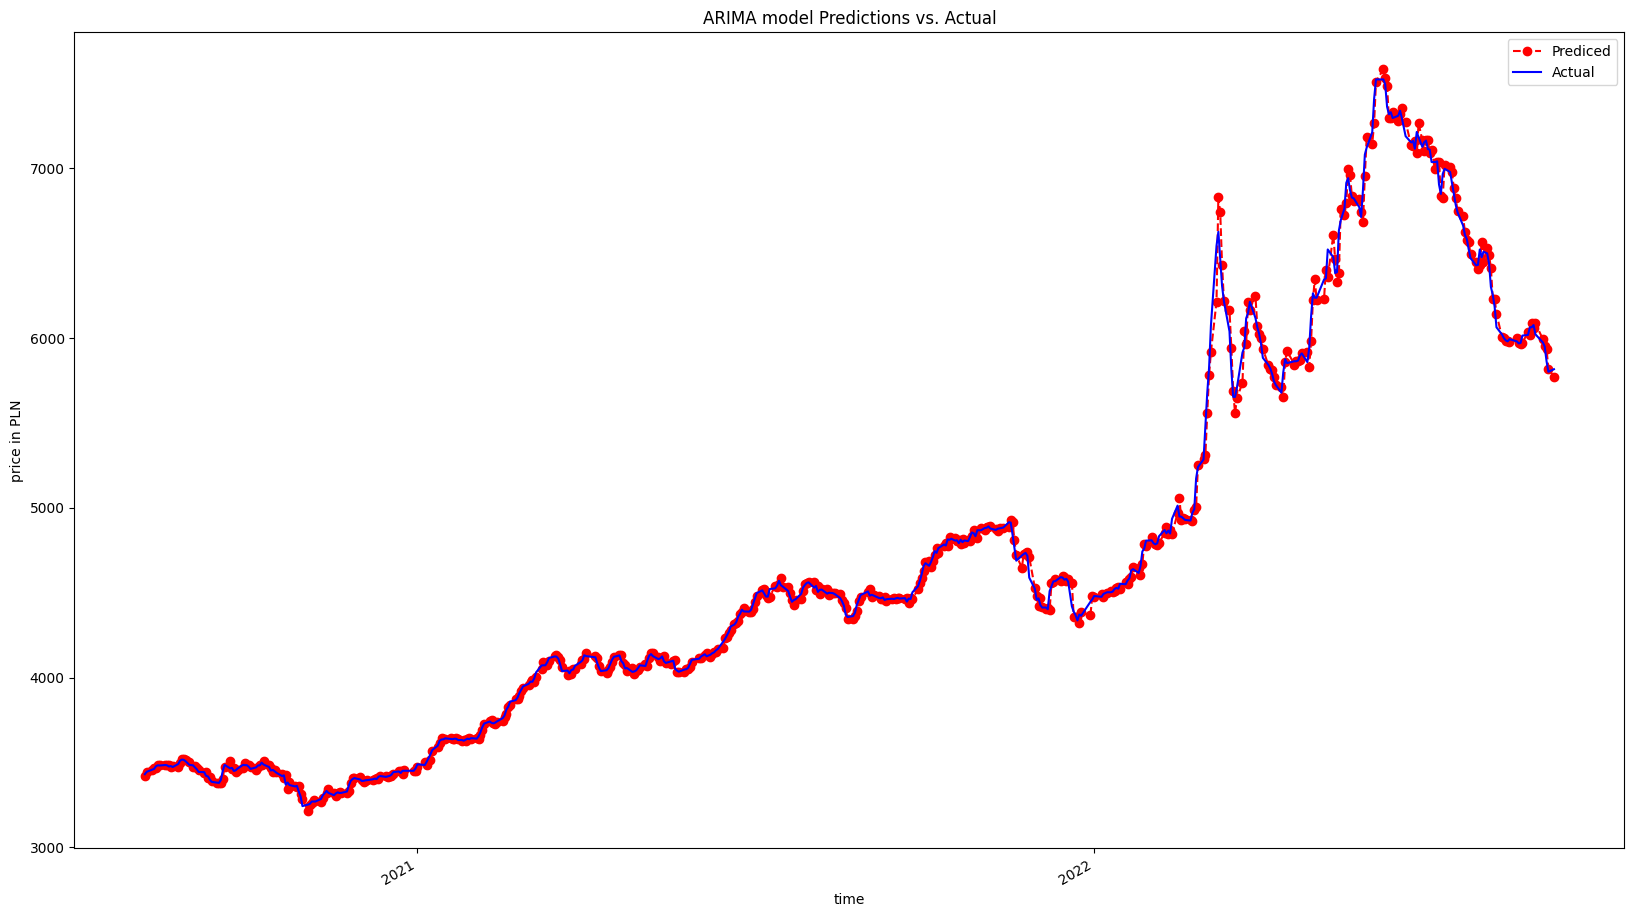

In [113]:
test = working[int(len(working)*split):]

plt.plot(test["Date"], predictions, color = "red", marker = "o", 
linestyle = "dashed", label = "Prediced")

plt.plot(test["Date"], test["Price"], color = "blue", label = "Actual")

plt.rcParams['figure.figsize'] = [20, 12]

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.title("ARIMA model Predictions vs. Actual")
plt.legend()
plt.show()